The paper to be processed: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9504555

Table 4.

citations:
fan 65
liskowski 66
khalaf 67
tan 69
guo 70
ulysal 71

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import auc_from_aggregated, max_acc_from_aggregated, estimate_acc_interval, auc_from
from mlscorecheck.auc import auc_onmin_grad, auc_maxa_grad, auc_max_grad, auc_rmin_grad, auc_max, auc_lower_from, auc_upper_from, auc_analytic, auc_analytic_exponents, exponential_fitting
from mlscorecheck.experiments import load_drive

In [2]:
fprs = np.array([0, 1 - 0.9768, 1])
tprs = np.array([0, 0.7763, 1])
fracs = (tprs * 30000 + fprs * 200000)/230000
row = {
    'fprs': fprs,
    'tprs': tprs,
    'fracs': fracs
}

In [3]:
exponential_fitting(row, 'fprs', 'fracs')

(1.0, -1, -1)

In [11]:
1/0.18 / (1/0.18 + 1/11)

0.9838998211091234

In [6]:
1.78/(1.78 + 0.12)

0.9368421052631579

In [2]:
data = {
'fan': {
    'sens': 0.7814,
    'spec': 0.9788,
    'acc': 0.9612,
    'cite': 65
},
'liskowski': {
    'sens': 0.7763,
    'spec': 0.9768,
    'acc': 0.9495,
    'auc': 0.972,
    'cite': 66
},
'khalaf': {
    'sens': 0.8397,
    'spec': 0.9562,
    'acc': 0.9456,
    'cite': 67
},
'tan': {
    'sens': 0.7537,
    'spec': 0.9694,
    'cite': 69
},
'guo': {
    'acc': 0.9199,
    'auc': 0.9652,
    'cite': 70
},
'uysal': {
    'sens': 0.7548,
    'spec': 0.9682,
    'acc': 0.9419,
    'cite': 71
}
}

In [7]:
auc_analytic({'sens': 0.7252, 'spec': 0.9798} | {'p': 30000, 'n': 300000})

0.0842909090909091
0.12990104486713247 1.5775630638744096


0.923921654222721

In [24]:
def one_exponent(sens, spec):
    x = np.logspace(-2, 0, 5000)
    idx = np.argmin(((2**x - (1 - spec))/((1 - spec)))**2 + ((2**(1/x) - sens)/(sens))**2)

    return x[idx]
    

In [25]:
one_exponent(0.7763, 0.9768)

np.float64(0.2815074533594139)

In [26]:
(1/0.2815)/((1/0.2815) + 0.2815)

0.9265760305436523

In [13]:
np.log10(1 - 0.9768)/(np.log10(1 - 0.9768) + np.log10(0.7763))

np.float64(0.9369610080262911)

In [10]:
exp_fpr, exp_tpr

(np.float64(1.5775630638744096), np.float64(0.12990104486713247))

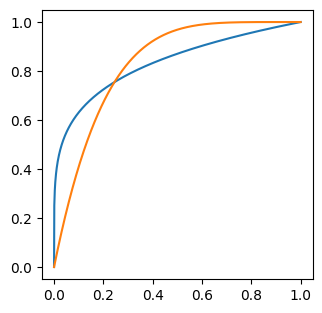

In [73]:
plt.figure(figsize=(3.5, 3.5))
x = np.linspace(0, 1, 1001)
#plt.plot(x**5, x**0.2)
#plt.plot(x, x**5)
plt.plot(x, x**0.2)

#plt.plot((1-(x)**0.2), 1 - x)
plt.plot(x, 1 - (1 - x)**5)

#plt.plot(x, ((x**0.2) + (1 - (1 - x)**5))/2)

In [6]:
auc_analytic({'sens': 0.7252, 'spec': 0.9798} | {'p': 200000, 'n': 30000})

0.6332434782608696


0.9239216542227211

In [3]:
data = pd.DataFrame(data).T

In [4]:
data

,sens,spec,acc,cite,auc
fan,0.7814,0.9788,0.9612,65.0,NaN
liskowski,0.7763,0.9768,0.9495,66.0,0.9720
khalaf,0.8397,0.9562,0.9456,67.0,NaN
tan,0.7537,0.9694,NaN,69.0,NaN
guo,NaN,NaN,0.9199,70.0,0.9652
uysal,0.7548,0.9682,0.9419,71.0,NaN


In [5]:
print(data.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & sens & spec & acc & cite & auc \\
\midrule
fan & 0.781400 & 0.978800 & 0.961200 & 65.000000 & NaN \\
liskowski & 0.776300 & 0.976800 & 0.949500 & 66.000000 & 0.972000 \\
khalaf & 0.839700 & 0.956200 & 0.945600 & 67.000000 & NaN \\
tan & 0.753700 & 0.969400 & NaN & 69.000000 & NaN \\
guo & NaN & NaN & 0.919900 & 70.000000 & 0.965200 \\
uysal & 0.754800 & 0.968200 & 0.941900 & 71.000000 & NaN \\
\bottomrule
\end{tabular}



In [6]:
drive = load_drive()[(1, 'all')]['test']['images']

In [7]:
ns = np.array([dr['n'] for dr in drive])
ps = np.array([dr['p'] for dr in drive])
ps, ns

(array([29440, 33790, 32893, 30354, 30912, 32116, 30152, 28389, 26741,
        27156, 29539, 28490, 32259, 26677, 23614, 29791, 27852, 26144,
        27371, 24265]),
 array([300520, 296170, 297067, 299606, 299048, 297844, 299808, 301571,
        303219, 302804, 300421, 301470, 297701, 303283, 306346, 300169,
        302108, 303816, 302589, 305695]))

In [8]:
data

,sens,spec,acc,cite,auc
fan,0.7814,0.9788,0.9612,65.0,NaN
liskowski,0.7763,0.9768,0.9495,66.0,0.9720
khalaf,0.8397,0.9562,0.9456,67.0,NaN
tan,0.7537,0.9694,NaN,69.0,NaN
guo,NaN,NaN,0.9199,70.0,0.9652
uysal,0.7548,0.9682,0.9419,71.0,NaN


In [9]:
np.mean(auc_from(
    scores={
        'sens': 0.7350,
        'spec': 0.9866,
        'acc': 0.9546,
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    lower='onmin',
    upper='max'
))

np.float64(nan)

In [10]:
auc_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin',
    upper='max',
    correction=None
)

(0.8892826425, 0.8892826425)

In [11]:
ps[0], ns[0]

(np.int64(29440), np.int64(300520))

In [11]:
(auc_lower_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin'
),
auc_upper_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    upper='max'
))

((0.783730445, 1.0), (0.99483484, 1.0))

In [12]:
np.mean(auc_from(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    #k=20,
    #ps=ps,
    #ns=ns,
    p=ps[0],
    n=ns[0],
    lower='rmin',
    upper='max',
    correction=None
))

np.float64(0.9072292499999999)

In [13]:
lower, upper = auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='max'
)
exponent = 1
#lweight = auc_onmin_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
lweight = auc_onmin_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
uweight = auc_max_grad(fpr=1 - data.loc['liskowski']['spec'], tpr=data.loc['liskowski']['sens'])**exponent
#uweight = auc_maxa_grad(acc=data.loc['liskowski']['acc'], p=ps[0], n=ns[0])**exponent
#uweight = 1 - np.sqrt(data.loc['liskowski']['sens'] * data.loc['liskowski']['spec'])
#lweight = np.sqrt(data.loc['liskowski']['sens'] * data.loc['liskowski']['spec'])

#uweight = 1
#lweight = ns[0]/ps[0]

print(lweight, uweight)

lweight2 = uweight / (uweight + lweight)
uweight2 = lweight / (uweight + lweight)

lower, upper, lweight2, uweight2, lower * lweight2 + upper * uweight2, (lower + upper)/2

0.7071067811865476 0.22489982214310444


(np.float64(0.783730445),
 1.0,
 np.float64(0.24130711235267618),
 np.float64(0.7586928876473238),
 np.float64(0.9478126181931517),
 np.float64(0.8918652225))

In [ ]:
np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='onmin',
    upper='maxa'
))

np.float64(0.9302712801483177)

In [15]:
auc_fan = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='onmin',
    upper='maxa'
))
auc_fan

np.float64(0.935310450253265)

In [16]:
tmp = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='min',
    upper='max'
))

In [17]:
(auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='min',
    upper='maxa'
)[1] + tmp)/2

np.float64(0.935310450253265)

In [18]:
auc_from_aggregated(
    scores={
        'sens': data.loc['fan']['sens'],
        'spec': data.loc['fan']['spec'],
        'acc': data.loc['fan']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
)

(np.float64(0.78910408), 0.9906209005065298)

In [19]:
auc_khalaf = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['khalaf']['sens'],
        'spec': data.loc['khalaf']['spec'],
        'acc': data.loc['khalaf']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_khalaf

np.float64(0.8992115244366155)

In [ ]:
auc_tan = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['tan']['sens'],
        'spec': data.loc['tan']['spec']
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_tan

np.float64(0.8737035580494894)

In [21]:
auc_uysal = np.mean(auc_from_aggregated(
    scores={
        'sens': data.loc['uysal']['sens'],
        'spec': data.loc['uysal']['spec']
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_uysal

np.float64(0.8725519741835043)

In [22]:
auc_liskowski = (auc_from_aggregated(
    scores={
        'sens': data.loc['liskowski']['sens'],
        'spec': data.loc['liskowski']['spec'],
        'acc': data.loc['liskowski']['acc'],
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_liskowski

(np.float64(0.783730445), 0.9840925602966356)

In [23]:
max_acc_liskowski = np.mean(max_acc_from_aggregated(
    scores={'auc': data.loc['liskowski']['auc']},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_liskowski

np.float64(0.9653779392691764)

In [24]:
max_acc_guo = np.mean(max_acc_from_aggregated(
    scores={'auc': data.loc['guo']['auc']},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_guo

np.float64(0.961250475882503)

In [25]:
np.mean(estimate_acc_interval(fpr=(1.0 - data.loc['tan']['spec'], 1.0 - data.loc['tan']['spec']), tpr=(data.loc['tan']['sens'], data.loc['tan']['sens']), ps=ps, ns=ns))

np.float64(0.9503445114559341)

In [26]:
auc_liskowski = (auc_from_aggregated(
    scores={
        'sens': 0.7891,
        'spec': 0.9848,
        'acc': 0.9674,
    },
    eps=1e-4,
    k=20,
    ps=ps,
    ns=ns,
    lower='rmin',
    upper='maxa'
))
auc_liskowski

(0.799615405, 0.9933853642342678)

In [27]:
np.mean(max_acc_from_aggregated(
    scores={'auc': 0.9652},
    eps=1e-4,
    ps=ps,
    ns=ns,
    lower='min',
    upper='rmax'
))
max_acc_guo

np.float64(0.961250475882503)